In [1]:
import os 
import sys 
import numpy as np

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset, random_split

In [3]:
import matplotlib.pyplot as plt
from init_model_lstm import DeconvolutionModel

In [4]:
def add_gaussian_noise(tensor, device, mean=0, stddev=0.1):
    noise=(torch.randn_like(tensor)*stddev+mean).to(device)
    noised_tensor=tensor+noise
    return noised_tensor

In [5]:
device = (
        "cuda"
        if torch.cuda.is_available()
        else "mps"
        if torch.backends.mps.is_available()
        else "cpu"
    )
print(f"Using {device} device")

n = 10000
known_freqs_file = f'known_freqs_{n}.npy'
snv_freqs_file = f'snv_freqs_{n}.npy'

Using mps device


In [6]:
snv_freqs=np.load(snv_freqs_file)
known_freqs=np.load(known_freqs_file)

In [7]:
snv_freqs=torch.from_numpy(snv_freqs).to(device)
# snv_freqs=add_gaussian_noise(snv_freqs, device)
known_freqs=torch.from_numpy(known_freqs).to(device)

In [8]:
batch_size=snv_freqs.shape[0]
seq_len=1
input_size = snv_freqs.shape[1]
output_size = known_freqs.shape[1]

snv_freqs=snv_freqs.view(batch_size, seq_len, input_size)

In [9]:
dataset = TensorDataset(snv_freqs, known_freqs)

total_size = len(dataset)
test_size = total_size // 10  # 10% for test
validation_size = total_size // 10  # 10% for validation
train_size = total_size - test_size - validation_size  # 80% train

# Split the dataset
train_dataset, validation_dataset, test_dataset = random_split(
        dataset, [train_size, validation_size, test_size]
    )

# verify sizes
print(f"Training set size: {len(train_dataset)}")
print(f"Validation set size: {len(validation_dataset)}")
print(f"Test set size: {len(test_dataset)}")

Training set size: 8000
Validation set size: 1000
Test set size: 1000


In [10]:
batch_size = 256  # Arbitrarily chosen
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
validation_loader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
hidden_size=4096
num_layers=1
model = DeconvolutionModel(input_size, hidden_size, output_size, num_layers, device)

model.fit(train_loader, validation_loader, epochs=10000)

# Evaluate the model
model.evaluate(validation_loader)

# Predict using the model
predictions, actuals = model.predict(test_loader)

Using mps device


In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(predictions.flatten(), actuals.flatten(), alpha=0.5)
plt.xlabel('Predicted Frequencies')
plt.ylabel('Actual Frequencies')
plt.title(f'Predicted vs Actual Frequencies of Baseline LSTM Model RMSE Loss Hidden Size 1024 Sparsemax 16 Batch Size 64 ReduceonPlateau')
plt.show()

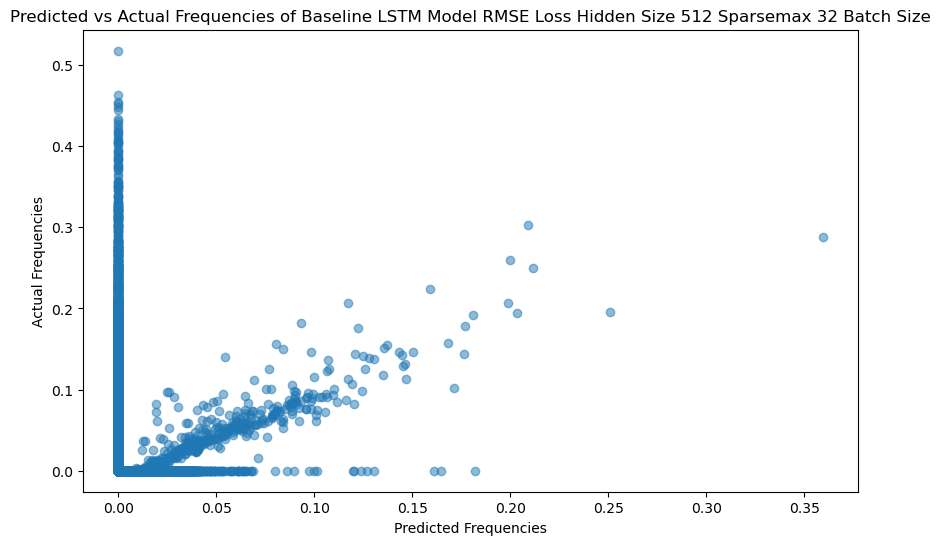

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(predictions.flatten(), actuals.flatten(), alpha=0.5)
plt.xlabel('Predicted Frequencies')
plt.ylabel('Actual Frequencies')
plt.title(f'Predicted vs Actual Frequencies of Baseline LSTM Model RMSE Loss Hidden Size 512 Sparsemax 32 Batch Size')
plt.show()

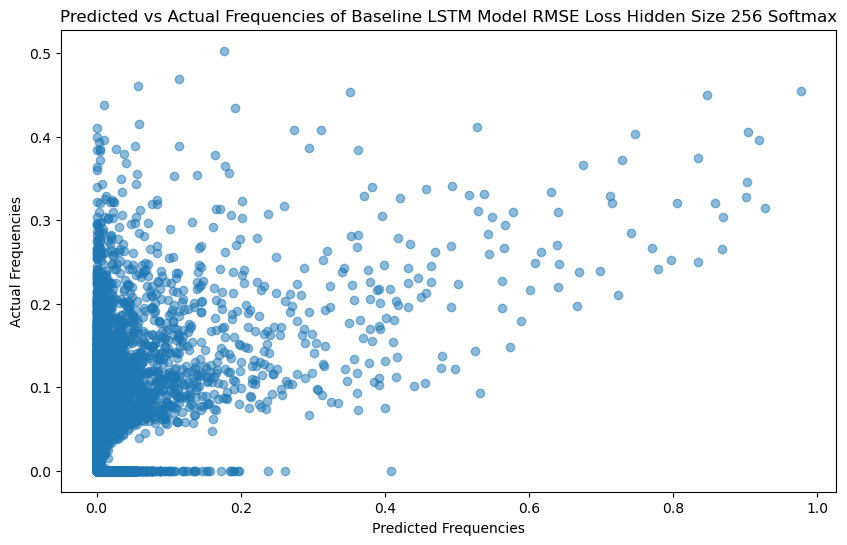

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(predictions.flatten(), actuals.flatten(), alpha=0.5)
plt.xlabel('Predicted Frequencies')
plt.ylabel('Actual Frequencies')
plt.title(f'Predicted vs Actual Frequencies of Baseline LSTM Model RMSE Loss Hidden Size 256 Softmax')
plt.show()

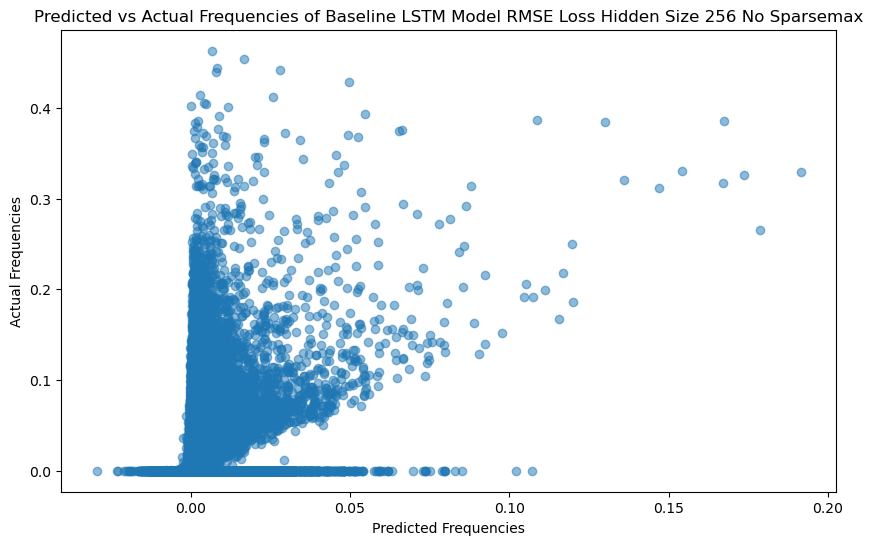

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(predictions.flatten(), actuals.flatten(), alpha=0.5)
plt.xlabel('Predicted Frequencies')
plt.ylabel('Actual Frequencies')
plt.title(f'Predicted vs Actual Frequencies of Baseline LSTM Model RMSE Loss Hidden Size 256 No Sparsemax')
plt.show()

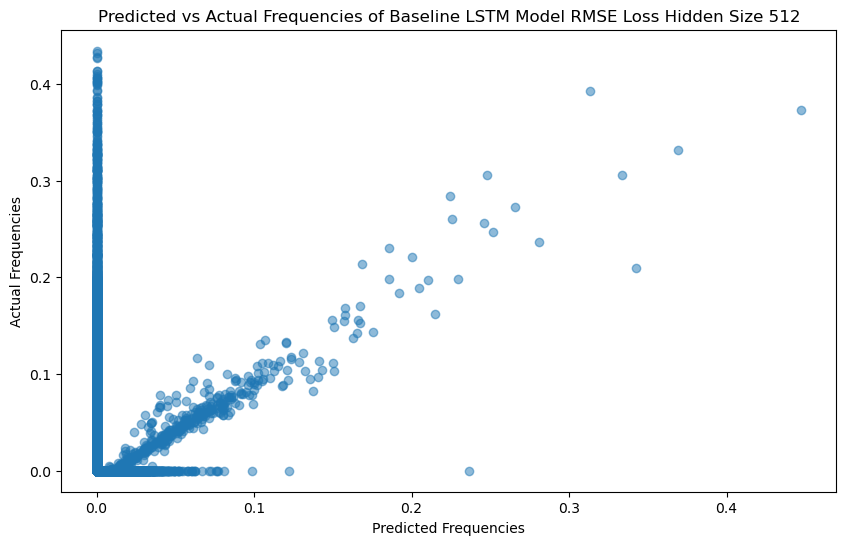

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(predictions.flatten(), actuals.flatten(), alpha=0.5)
plt.xlabel('Predicted Frequencies')
plt.ylabel('Actual Frequencies')
plt.title(f'Predicted vs Actual Frequencies of Baseline LSTM Model RMSE Loss Hidden Size 512')
plt.show()

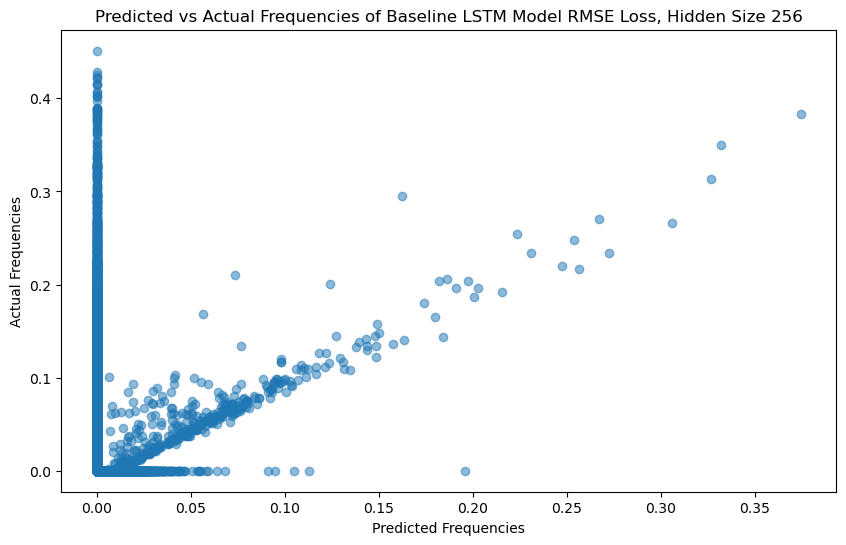

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(predictions.flatten(), actuals.flatten(), alpha=0.5)
plt.xlabel('Predicted Frequencies')
plt.ylabel('Actual Frequencies')
plt.title(f'Predicted vs Actual Frequencies of Baseline LSTM Model RMSE Loss, Hidden Size 256')
plt.show()

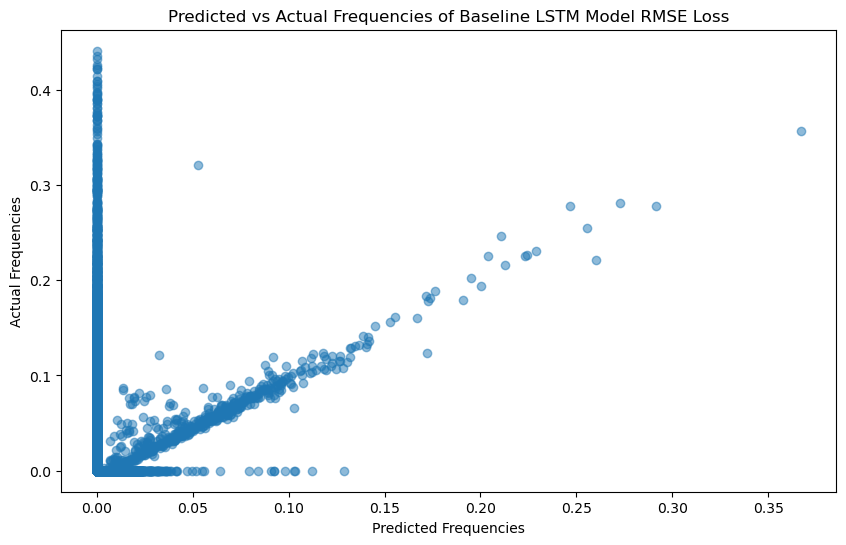

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(predictions.flatten(), actuals.flatten(), alpha=0.5)
plt.xlabel('Predicted Frequencies')
plt.ylabel('Actual Frequencies')
plt.title(f'Predicted vs Actual Frequencies of Baseline LSTM Model RMSE Loss')
plt.show()

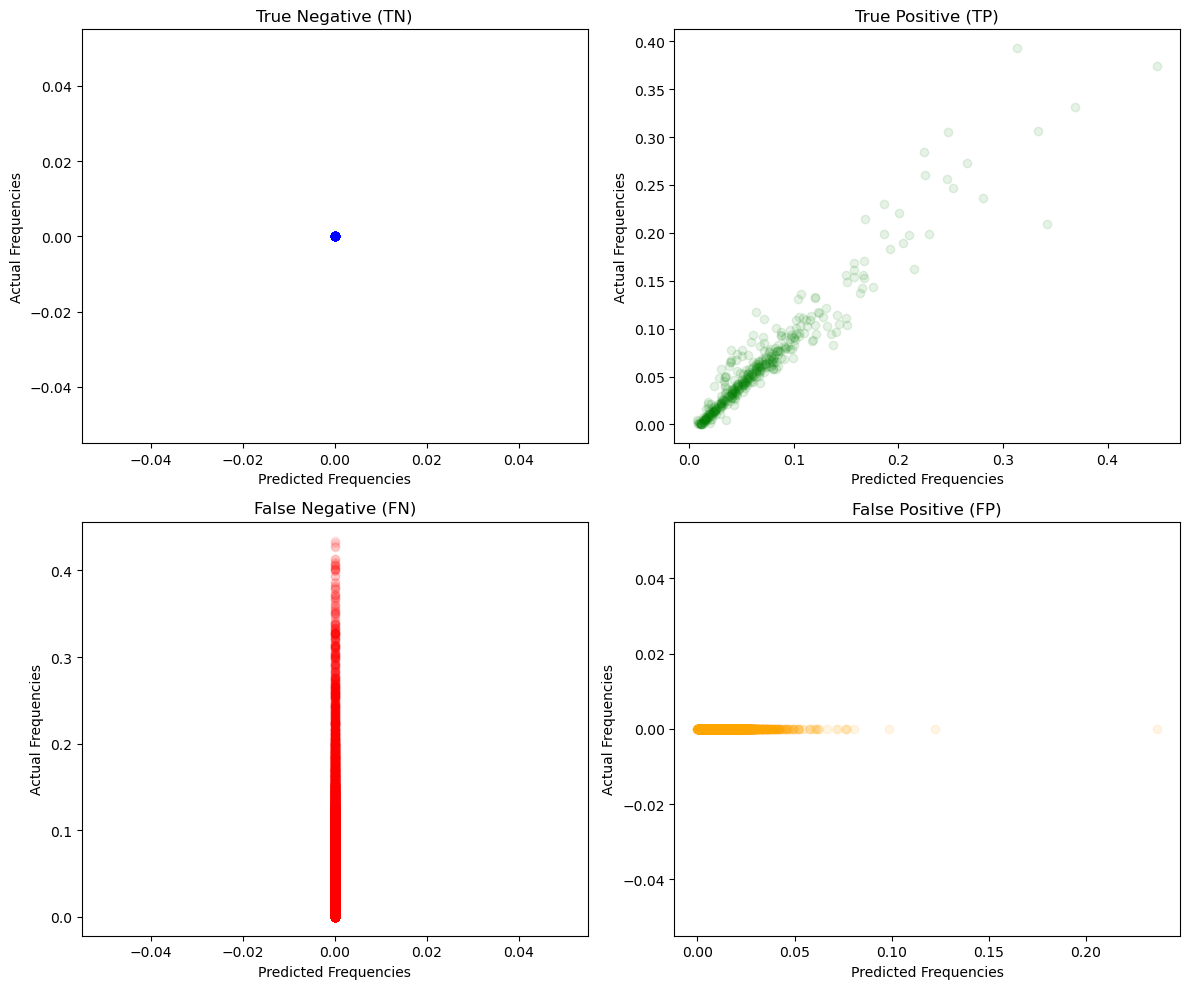

Accuracy: 0.97273838
Precision: 0.00416109
Recall: 0.02228756
F1 Score: 0.00701287


In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import gaussian_kde

y_pred=predictions.flatten()
y_true= actuals.flatten()

tn_mask = (y_true == 0) & (y_pred == 0)
tp_mask = (y_true != 0) & (y_pred != 0)
fn_mask = (y_true != 0) & (y_pred == 0)
fp_mask = (y_true == 0) & (y_pred != 0)

# Scatter plot
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Scatter plot for True Negatives (TN)
axs[0, 0].scatter(y_pred[tn_mask], y_true[tn_mask], color='blue', alpha=0.1)
axs[0, 0].set_title('True Negative (TN)')
axs[0, 0].set_xlabel('Predicted Frequencies')
axs[0, 0].set_ylabel('Actual Frequencies')

# Scatter plot for True Positives (TP)
axs[0, 1].scatter(y_pred[tp_mask], y_true[tp_mask], color='green', alpha=0.1)
axs[0, 1].set_title('True Positive (TP)')
axs[0, 1].set_xlabel('Predicted Frequencies')
axs[0, 1].set_ylabel('Actual Frequencies')

# Scatter plot for False Negatives (FN)
axs[1, 0].scatter(y_pred[fn_mask], y_true[fn_mask], color='red', alpha=0.1)
axs[1, 0].set_title('False Negative (FN)')
axs[1, 0].set_xlabel('Predicted Frequencies')
axs[1, 0].set_ylabel('Actual Frequencies')

# Scatter plot for False Positives (FP)
axs[1, 1].scatter(y_pred[fp_mask], y_true[fp_mask], color='orange', alpha=0.1)
axs[1, 1].set_title('False Positive (FP)')
axs[1, 1].set_xlabel('Predicted Frequencies')
axs[1, 1].set_ylabel('Actual Frequencies')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

y_true_binary = (y_true != 0).astype(int)
y_pred_binary = (y_pred != 0).astype(int)

accuracy = accuracy_score(y_true_binary, y_pred_binary)
precision = precision_score(y_true_binary, y_pred_binary)
recall = recall_score(y_true_binary, y_pred_binary)
f1 = f1_score(y_true_binary, y_pred_binary)

# Print out the metrics using f-strings
print(f"Accuracy: {accuracy:.8f}")
print(f"Precision: {precision:.8f}")
print(f"Recall: {recall:.8f}")
print(f"F1 Score: {f1:.8f}")

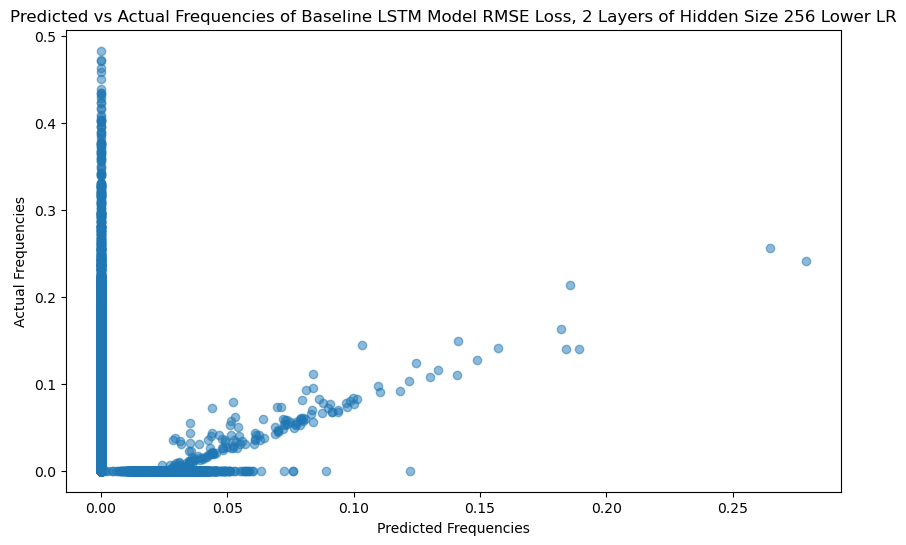

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(predictions.flatten(), actuals.flatten(), alpha=0.5)
plt.xlabel('Predicted Frequencies')
plt.ylabel('Actual Frequencies')
plt.title(f'Predicted vs Actual Frequencies of Baseline LSTM Model RMSE Loss, 2 Layers of Hidden Size 256 Lower LR')
plt.show()

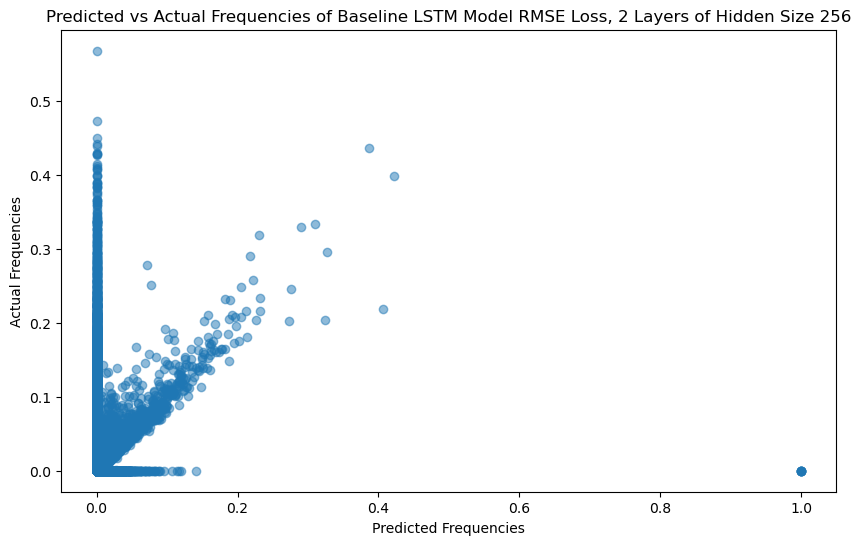

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(predictions.flatten(), actuals.flatten(), alpha=0.5)
plt.xlabel('Predicted Frequencies')
plt.ylabel('Actual Frequencies')
plt.title(f'Predicted vs Actual Frequencies of Baseline LSTM Model RMSE Loss, 2 Layers of Hidden Size 256')
plt.show()

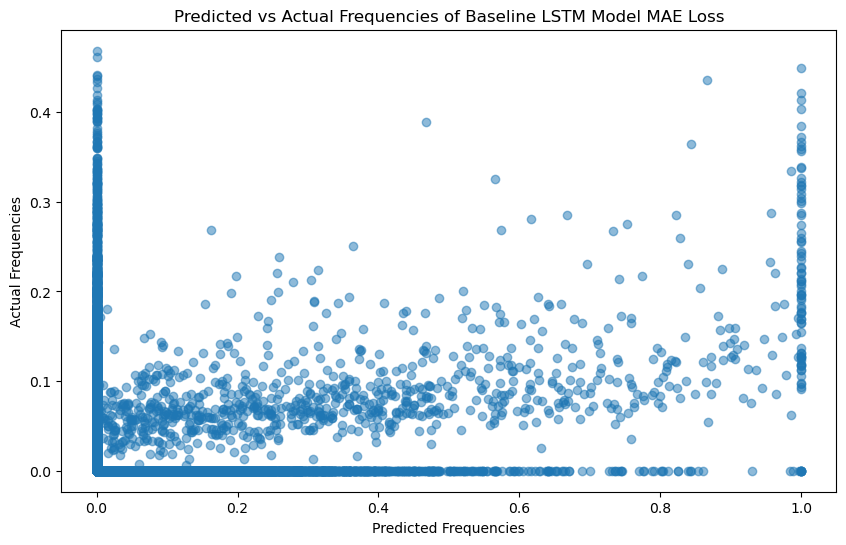

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(predictions.flatten(), actuals.flatten(), alpha=0.5)
plt.xlabel('Predicted Frequencies')
plt.ylabel('Actual Frequencies')
plt.title(f'Predicted vs Actual Frequencies of Baseline LSTM Model MAE Loss')
plt.show()